In [2]:
!pip install torch
!pip install torchvision

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

In [4]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

In [30]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [33]:
# Get the list of category names
category_names = testset.classes
category_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
batch_size = 32
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [7]:
class CIFAR10Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(0.3)

        self.conv2 = nn.Conv2d(32, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))

        self.flat = nn.Flatten()

        self.fc3 = nn.Linear(8192, 512)
        self.act3 = nn.ReLU()
        self.drop3 = nn.Dropout(0.5)

        self.fc4 = nn.Linear(512, 10)

    def forward(self, x):
        # input 3x32x32, output 32x32x32
        x = self.act1(self.conv1(x))
        x = self.drop1(x)
        # input 32x32x32, output 32x32x32
        x = self.act2(self.conv2(x))
        # input 32x32x32, output 32x16x16
        x = self.pool2(x)
        # input 32x16x16, output 8192
        x = self.flat(x)
        # input 8192, output 512
        x = self.act3(self.fc3(x))
        x = self.drop3(x)
        # input 512, output 10
        x = self.fc4(x)
        return x

In [8]:
model = CIFAR10Model()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [9]:
n_epochs = 20
for epoch in range(n_epochs):
    for inputs, labels in trainloader:
        # forward, backward, and then weight update
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = 0
    count = 0
    for inputs, labels in testloader:
        y_pred = model(inputs)
        acc += (torch.argmax(y_pred, 1) == labels).float().sum()
        count += len(labels)
    acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

Epoch 0: model accuracy 36.48%
Epoch 1: model accuracy 41.40%
Epoch 2: model accuracy 46.86%
Epoch 3: model accuracy 49.89%
Epoch 4: model accuracy 51.29%
Epoch 5: model accuracy 53.84%
Epoch 6: model accuracy 56.20%
Epoch 7: model accuracy 56.84%
Epoch 8: model accuracy 59.67%
Epoch 9: model accuracy 60.83%
Epoch 10: model accuracy 62.86%
Epoch 11: model accuracy 63.85%
Epoch 12: model accuracy 64.99%
Epoch 13: model accuracy 67.58%
Epoch 14: model accuracy 69.25%
Epoch 15: model accuracy 70.21%
Epoch 16: model accuracy 72.16%
Epoch 17: model accuracy 73.74%
Epoch 18: model accuracy 74.37%
Epoch 19: model accuracy 76.16%


In [10]:
torch.save(model.state_dict(), "cifar10model.pth")

In [11]:
acc += (torch.argmax(y_pred, 1) == labels).float().sum()

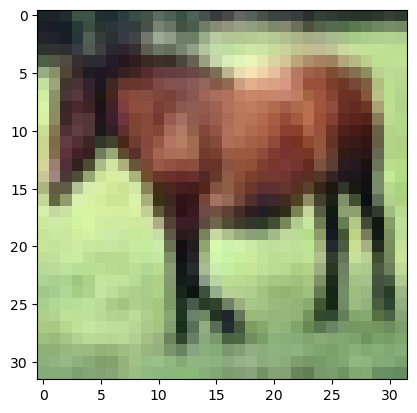

In [12]:
import matplotlib.pyplot as plt

plt.imshow(trainset.data[7])
plt.show()

In [13]:
X = torch.tensor([trainset.data[7]], dtype=torch.float32).permute(0,3,1,2)
model.eval()
with torch.no_grad():
    feature_maps = model.conv1(X)

/var/folders/7p/nhr_8mz933v_4r1mwyd3_jg40000gp/T/ipykernel_57718/2765902514.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:248.)
  X = torch.tensor([trainset.data[7]], dtype=torch.float32).permute(0,3,1,2)


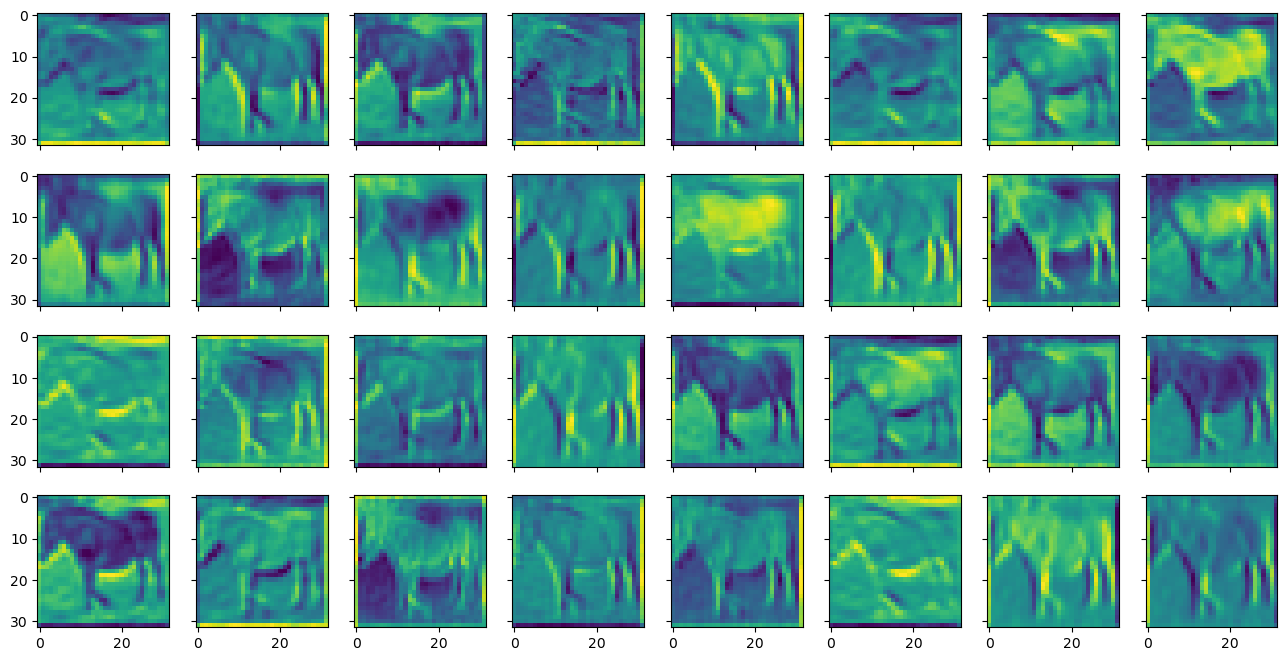

In [14]:
fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    ax[row][col].imshow(feature_maps[0][i])
plt.show()

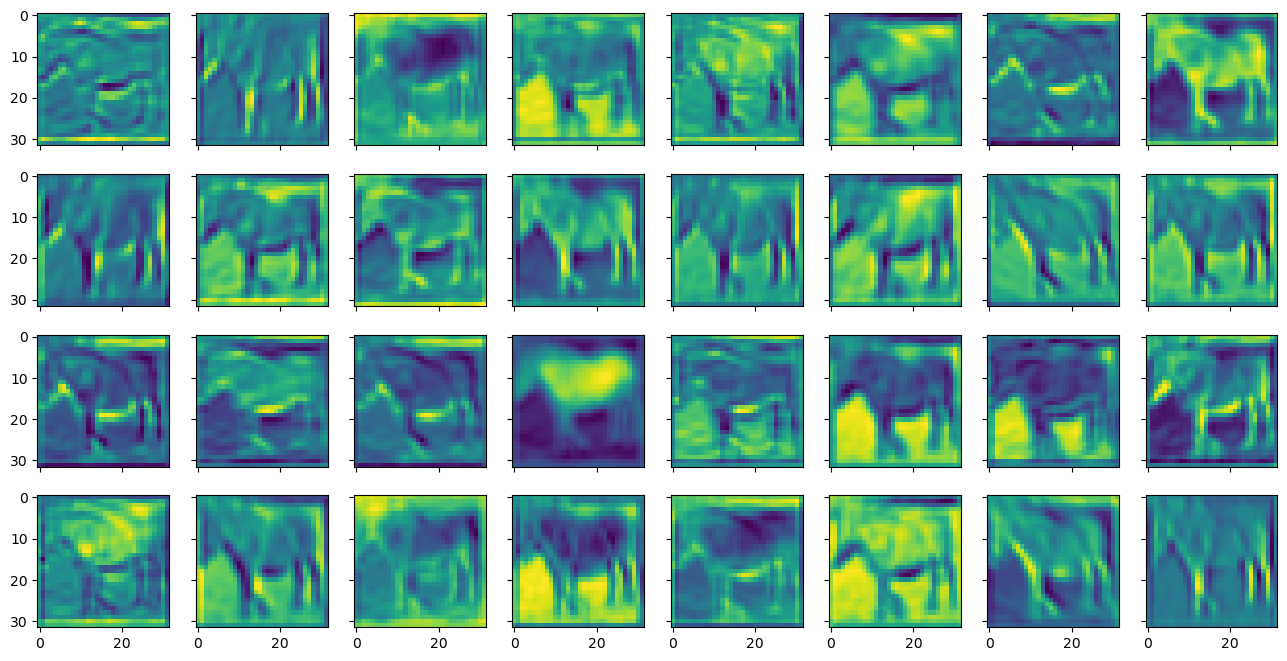

In [15]:
X = torch.tensor([trainset.data[7]], dtype=torch.float32).permute(0,3,1,2)

model.eval()
with torch.no_grad():
    feature_maps = model.act1(model.conv1(X))
    feature_maps = model.drop1(feature_maps)
    feature_maps = model.conv2(feature_maps)

fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    ax[row][col].imshow(feature_maps[0][i])
plt.show()

In [22]:
def predict_from_saved_model(input_file=testset.data[6]):

    # Instantiate the model
    model = CIFAR10Model()

    # Load the saved state dictionary
    model.load_state_dict(torch.load("cifar10model.pth"))

    # Set the model to evaluation mode
    model.eval()

    # Prepare the input
    input_data = torch.tensor([input_file], dtype=torch.float32).permute(0,3,1,2)

    # Run the prediction
    with torch.no_grad():
        output = model.forward(input_data)

    # Process the output
    predicted_class = torch.argmax(output, dim=1)
    
    return predicted_class


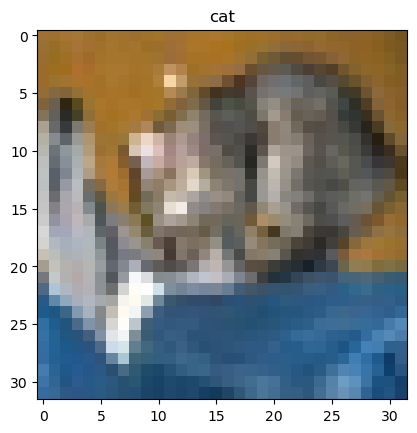

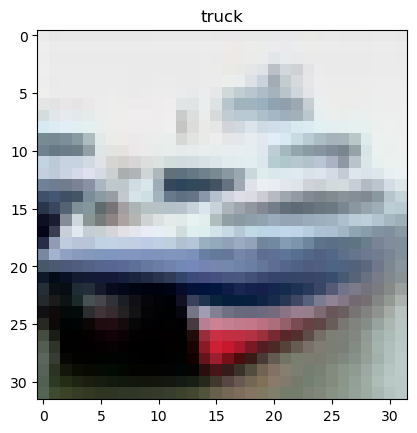

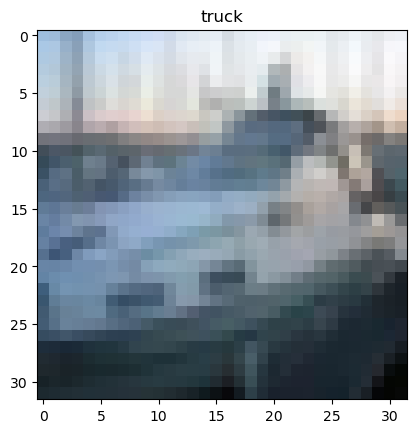

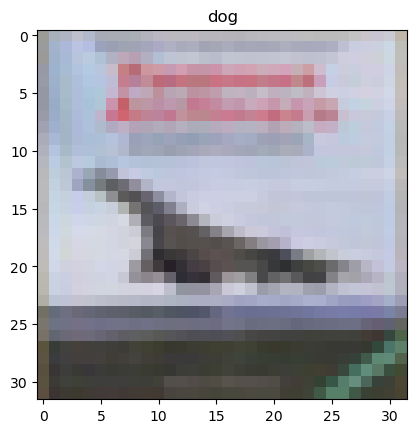

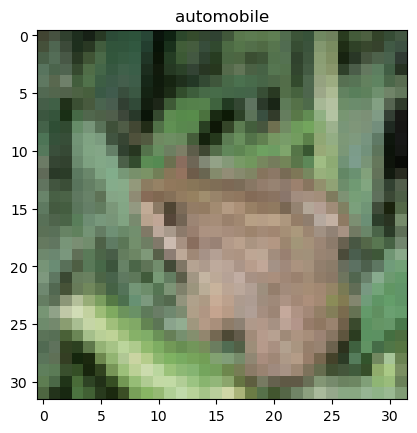

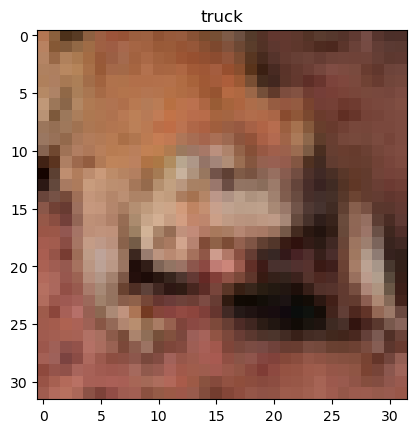

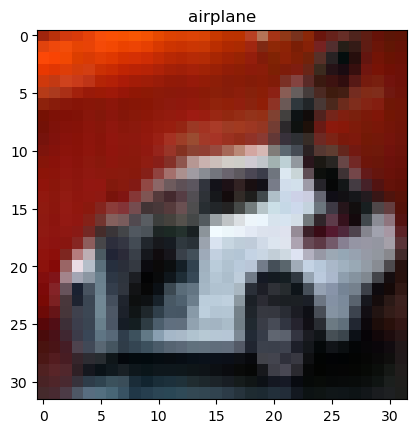

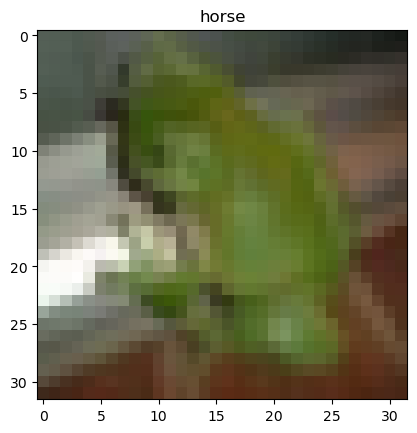

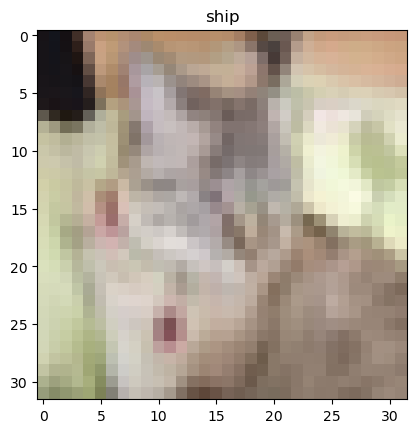

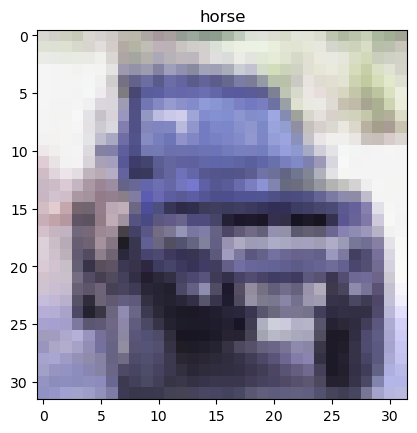

In [34]:
for i in range(0,10):
    result = predict_from_saved_model(trainset.data[i])
    plt.title(category_names[result])
    plt.imshow(testset.data[i])
    plt.show()
    